**TITANIC**

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


W tej czesci kodu wysteouje tylko importowanie bibliotek

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)

In [ ]:
data_titanic=pd.read_excel('/content/sample_data/titanic.xlsx')
data_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Ładowanie excela do programu(macierzy)

In [ ]:

MissAge=(data_titanic['age'].where(data_titanic['sex']=='female').where(data_titanic['name'].str.contains(pat='Miss')).where(data_titanic['sibsp']==0)).median()
MasterAge=(data_titanic['age'].where(data_titanic['sex']=='male').where(data_titanic['name'].str.contains(pat='Master'))).median()
Mrrs=(data_titanic['age'].where(data_titanic['name'].str.contains(pat='Sir' or 'Mr' or 'Ms' or 'Mrs'))).median()
Dr=(data_titanic['age'].where(data_titanic['sex']=='male').where(data_titanic['name'].str.contains(pat='Dr'))).median()


for a in range(len(data_titanic['age'])):
  if data_titanic['name'][a].__contains__('Master') and pd.isna(data_titanic['age'][a]):
    data_titanic['age'][a] = MasterAge
  elif data_titanic['name'][a].__contains__('Miss') and pd.isna(data_titanic['age'][a]):
    data_titanic['age'][a] = MissAge
  elif data_titanic['name'][a].__contains__('Dr') and pd.isna(data_titanic['age'][a]):
    data_titanic['age'][a] = Dr
  elif (data_titanic['name'][a].__contains__('Mr') or data_titanic['name'][a].__contains__('Mrs') or data_titanic['name'][a].__contains__('Sir') or data_titanic['name'][a].__contains__('Ms')) and pd.isna(data_titanic['age'][a]):
    data_titanic['age'][a] = Mrrs

data_titanic['fare'].fillna(data_titanic['fare'].median(), axis = 0, inplace = True)
data_titanic['boat'].fillna(0, axis = 0, inplace = True)
data_titanic['embarked'].fillna(data_titanic['embarked'].mode()[0], axis = 0,inplace = True)

<ipython-input-47-9edef5312e6a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['age'][a] = Mrrs
<ipython-input-47-9edef5312e6a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['age'][a] = Dr
<ipython-input-47-9edef5312e6a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['age'][a] = MissAge
<ipython-input-47-9edef5312e6a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

MissAge,MasterAge,Mrrs,Dr są to zmienne przetrzymujące wartośći dla poszczegolnych grup wikowych,plci,statusu, a dokladniej ich mediana wieku, która jest przypisywana w braukące miejsca w excelu w zależności od zawartej nazwy w imienie pasazera. wpisywanie danych wykonywane jest w pętli

a dla fare,boat, ebarked wykorzystywana jest komenda z biblioteki pandas na wpisywanie wartości w brakujące miejsca

In [ ]:
#changing val met
data_titanic.dtypes[(data_titanic.dtypes == 'float64') | (data_titanic.dtypes == 'int64')]

data_titanic.dtypes[data_titanic.dtypes == 'object']

data_titanic['age'] = data_titanic['age'].astype('int64')
data_titanic['sex'] = data_titanic['sex'].astype('category')
data_titanic['cabin'] = data_titanic['cabin'].astype('category')
data_titanic['embarked'] = data_titanic['embarked'].astype('category')
data_titanic['survived'] = data_titanic['survived'].astype('category')
data_titanic['pclass'] = data_titanic['pclass'].astype('category')

Tu natomisast przypisywane są wartości klas/kolumn int lub kategoria

In [ ]:
#add new val
data_titanic['family_Size'] = data_titanic.apply(lambda x : x['sibsp'] + x['parch'] + 1, axis = 1)
data_titanic['family_Size'] = data_titanic['family_Size'].astype('int64')

data_titanic['mpc'] = data_titanic.apply(lambda x : x['age'] * x['pclass'], axis = 1)
data_titanic['mpc'] = data_titanic['mpc'].astype('int64')

def Age_range(name):
  for a in range(len(data_titanic['age'])):
    if data_titanic['age'][a] < 5 :
      return 'bobas'

data_titanic['age_range'] = data_titanic.apply(Age_range, axis = 1)

for a in range(len(data_titanic['age'])):
  if data_titanic['age'][a] < 6 :
    data_titanic['age_range'][a] = 'Bobas'
  elif data_titanic['age'][a] > 5 and  data_titanic['age'][a] < 12  :
    data_titanic['age_range'][a] = 'Dzieciak'
  elif data_titanic['age'][a] > 11 and  data_titanic['age'][a] < 18  :
    data_titanic['age_range'][a] = 'Nastolatek'
  else :
    data_titanic['age_range'][a] = 'Dorosly'

data_titanic['age_range'] = data_titanic['age_range'].astype('category')

import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)

    if title_search:
        return title_search.group(1)
    return ""

data_titanic

<ipython-input-49-96c7d4a936a4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['age_range'][a] = 'Dorosly'
<ipython-input-49-96c7d4a936a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['age_range'][a] = 'Bobas'
<ipython-input-49-96c7d4a936a4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['age_range'][a] = 'Nastolatek'
<ipython-input-49-96c7d4a936a4>:19: SettingWithCopyWarning: 
A value 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,family_Size,mpc,age_range
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,29,Dorosly
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,0,Bobas
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,0,NaN,"Montreal, PQ / Chesterville, ON",4,2,Bobas
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON",4,30,Dorosly
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,0,NaN,"Montreal, PQ / Chesterville, ON",4,25,Dorosly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,0,328.0,NaN,2,42,Nastolatek
1305,3,0,"Zabour, Miss. Thamine",female,23,1,0,2665,14.4542,NaN,C,0,NaN,NaN,2,69,Dorosly
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,0,304.0,NaN,1,78,Dorosly
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,0,NaN,NaN,1,81,Dorosly


Tworzymy nowe kolumny Family_size jak nazwa wskazuje przypisywane jest ile osoba na pokładnie ma członków rodziny z nią płynącą.
mpc to natomiast uwypuklenie szans na przeżycie podróżnika w zaleznosci od wieku i klasy ktora podruzuje
age_range to przypisanie kategorii wiekowej do osoby co wpłynie na jej pierwszeństwo w ucieczce, przypisywanie tej kategorii występuje w petli na podstawie wieku pasazera, a Family size oraz mpc jest  tworzone i przypisywane za pomocą lambdy

funckja get_title jest wykorzystywana w pozniejszej czesci kodu zamiast imienia, poniewaz status ma wieksze znaczenie na przezycie niz imie


In [ ]:
data_titanic['title'] = data_titanic['name'].apply(get_title)
data_titanic['title'] = data_titanic['title'].astype('category')

data_titanic.drop(columns = ['name'], inplace = True)

data_titanic['title'] = data_titanic['title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
data_titanic['title'] = data_titanic['title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
data_titanic['title'] = data_titanic['title'].replace(['Mlle.', 'Ms.'], 'Miss.')
data_titanic['title'] = data_titanic['title'].replace(['Mme.'], 'Mrs.')


W tej czesci kodu wystepuje utworzenie kolumny title jak wczesniej wpomnialem oraz zamiana tych nazwa na officer, lub royal badz tez miss, mrs

In [ ]:
#cutting value
for a in range(len(data_titanic['age'])):
  if data_titanic['age'][a] > 67 :
      data_titanic['age'][a]=67

for a in range(len(data_titanic['fare'])):
  if data_titanic['fare'][a] > 260 :
      data_titanic['fare'][a]=260

for a in range(len(data_titanic['mpc'])):
  if data_titanic['mpc'][a] > 165 :
      data_titanic['mpc'][a]=165
  elif data_titanic['mpc'][a] < 10 :
      data_titanic['mpc'][a]=10

for i in range(len(data_titanic['ticket'])):
      if data_titanic['ticket'][i].__contains__('Basle'):
        w=data_titanic['ticket'][i].split(' ')
        data_titanic['ticket'][i]=int(w[2])
      elif data_titanic['ticket'][i].__contains__(' '):
        w=data_titanic['ticket'][i].split(' ')
        a=w[1].split('.')
        data_titanic['ticket'][i]=a[0]
      elif data_titanic['ticket'][i].__contains__('LINE') or data_titanic['ticket'][i].__contains__('Basle'):
        data_titanic['ticket'][i]=0

data_titanic

<ipython-input-51-cf0cd49e4955>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['age'][a]=67
<ipython-input-51-cf0cd49e4955>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['fare'][a]=260
<ipython-input-51-cf0cd49e4955>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['mpc'][a]=10
<ipython-input-51-cf0cd49e4955>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,family_Size,mpc,age_range,title
0,1,1,female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,29,Dorosly,Miss.
1,1,1,male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,10,Bobas,Master.
2,1,0,female,2,1,2,113781,151.5500,C22 C26,S,0,NaN,"Montreal, PQ / Chesterville, ON",4,10,Bobas,Miss.
3,1,0,male,30,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON",4,30,Dorosly,Mr.
4,1,0,female,25,1,2,113781,151.5500,C22 C26,S,0,NaN,"Montreal, PQ / Chesterville, ON",4,25,Dorosly,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14,1,0,2665,14.4542,NaN,C,0,328.0,NaN,2,42,Nastolatek,Miss.
1305,3,0,female,23,1,0,2665,14.4542,NaN,C,0,NaN,NaN,2,69,Dorosly,Miss.
1306,3,0,male,26,0,0,2656,7.2250,NaN,C,0,304.0,NaN,1,78,Dorosly,Mr.
1307,3,0,male,27,0,0,2670,7.2250,NaN,C,0,NaN,NaN,1,81,Dorosly,Mr.


Tu stosuje ucinanie wyrozniajacych odskakujacych wartosci

In [ ]:
#normalize
data_titanic['fare']=data_titanic['fare']/max(data_titanic['fare'])
data_titanic['mpc']=data_titanic['mpc']/max(data_titanic['mpc'])


tu normalizuje wartosci z fare oraz mpc poniewaz to jedyne kolumny ktorych wartosci sa wysokie i sie wyrozniaja, a inne zostana usuniete poniwaz moim zdaniem nie maja wplywu na wynik. normalizaja wystepuje poprzez podzielenie wartosci przez najwyzsza wartosc w zbiorze by przedzial byl od 0 do 1

<ipython-input-53-94674a1f151f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_titanic.corr(), annot=True)


<Axes: >

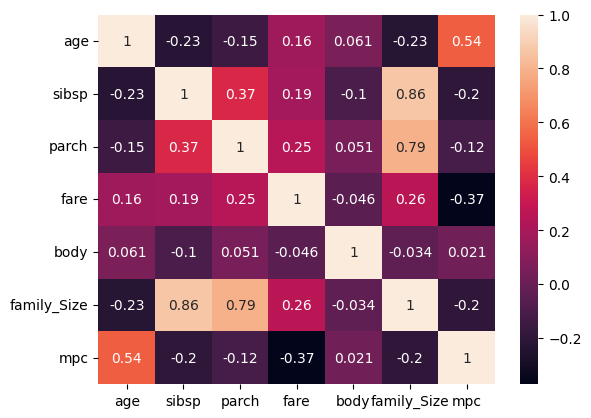

In [ ]:
#EDA przed usunięciem kolumn
sns.heatmap(data_titanic.corr(), annot=True)

In [ ]:
#second_dataset=data_titanic.copy()
data_titanic.drop(columns = ['sibsp', 'parch','body','boat','home_dest'],axis = 1,  inplace = True)
data_titanic

,pclass,survived,sex,age,ticket,fare,cabin,embarked,family_Size,mpc,age_range,title
0,1,1,female,29,24160,0.812837,B5,S,1,0.175758,Dorosly,Miss.
1,1,1,male,0,113781,0.582885,C22 C26,S,4,0.060606,Bobas,Master.
2,1,0,female,2,113781,0.582885,C22 C26,S,4,0.060606,Bobas,Miss.
3,1,0,male,30,113781,0.582885,C22 C26,S,4,0.181818,Dorosly,Mr.
4,1,0,female,25,113781,0.582885,C22 C26,S,4,0.151515,Dorosly,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14,2665,0.055593,NaN,C,2,0.254545,Nastolatek,Miss.
1305,3,0,female,23,2665,0.055593,NaN,C,2,0.418182,Dorosly,Miss.
1306,3,0,male,26,2656,0.027788,NaN,C,1,0.472727,Dorosly,Mr.
1307,3,0,male,27,2670,0.027788,NaN,C,1,0.490909,Dorosly,Mr.


Usuwanie kolumn ktore nie maja wplywu na wynik

<ipython-input-55-3a3f1ad2f8d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_titanic.corr(), annot=True)


<Axes: >

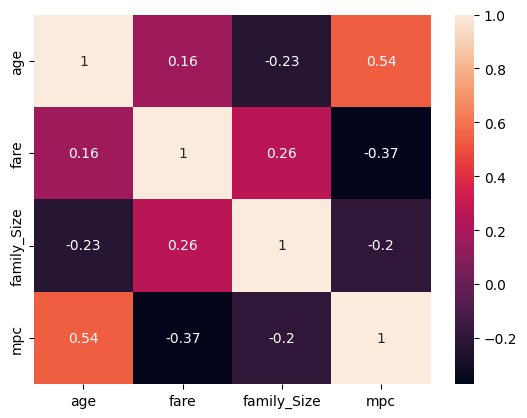

In [ ]:
#EDA po usunięciem kolumn
sns.heatmap(data_titanic.corr(), annot=True)

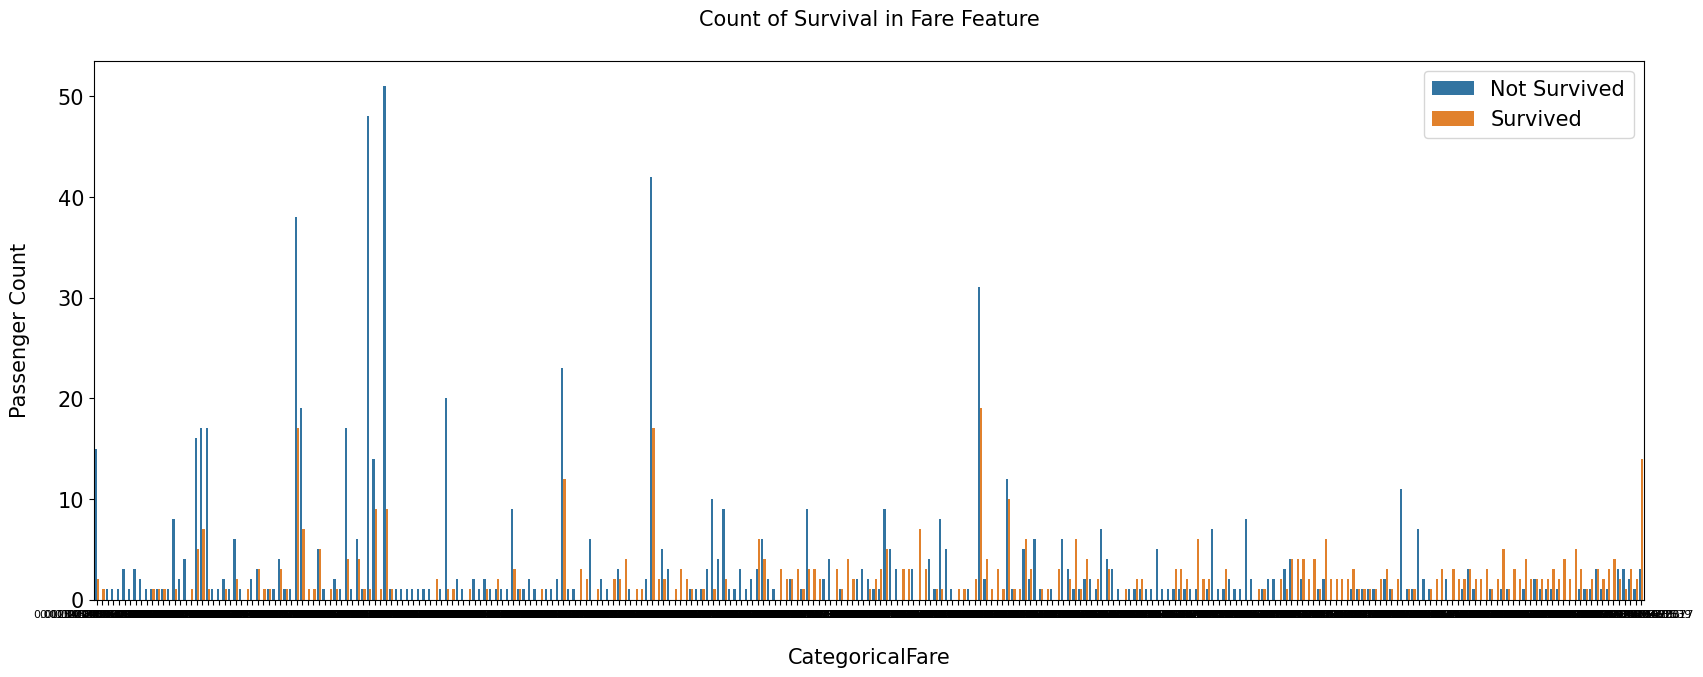

In [ ]:
fig, axs = plt.subplots(figsize=(20, 7))
sns.countplot(x='fare', hue='survived', data=data_titanic)

plt.xlabel('CategoricalFare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

<Axes: xlabel='age', ylabel='mpc'>

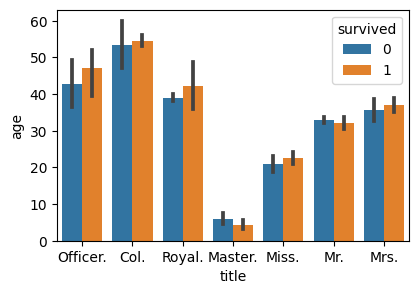

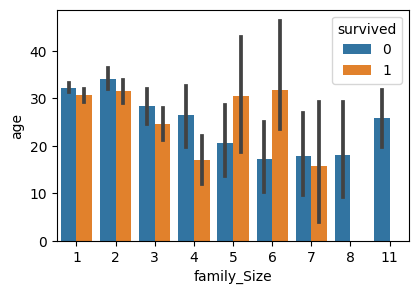

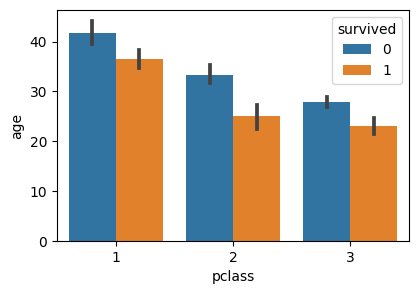

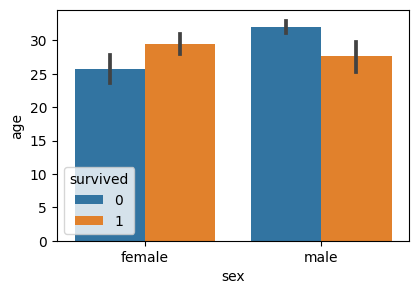

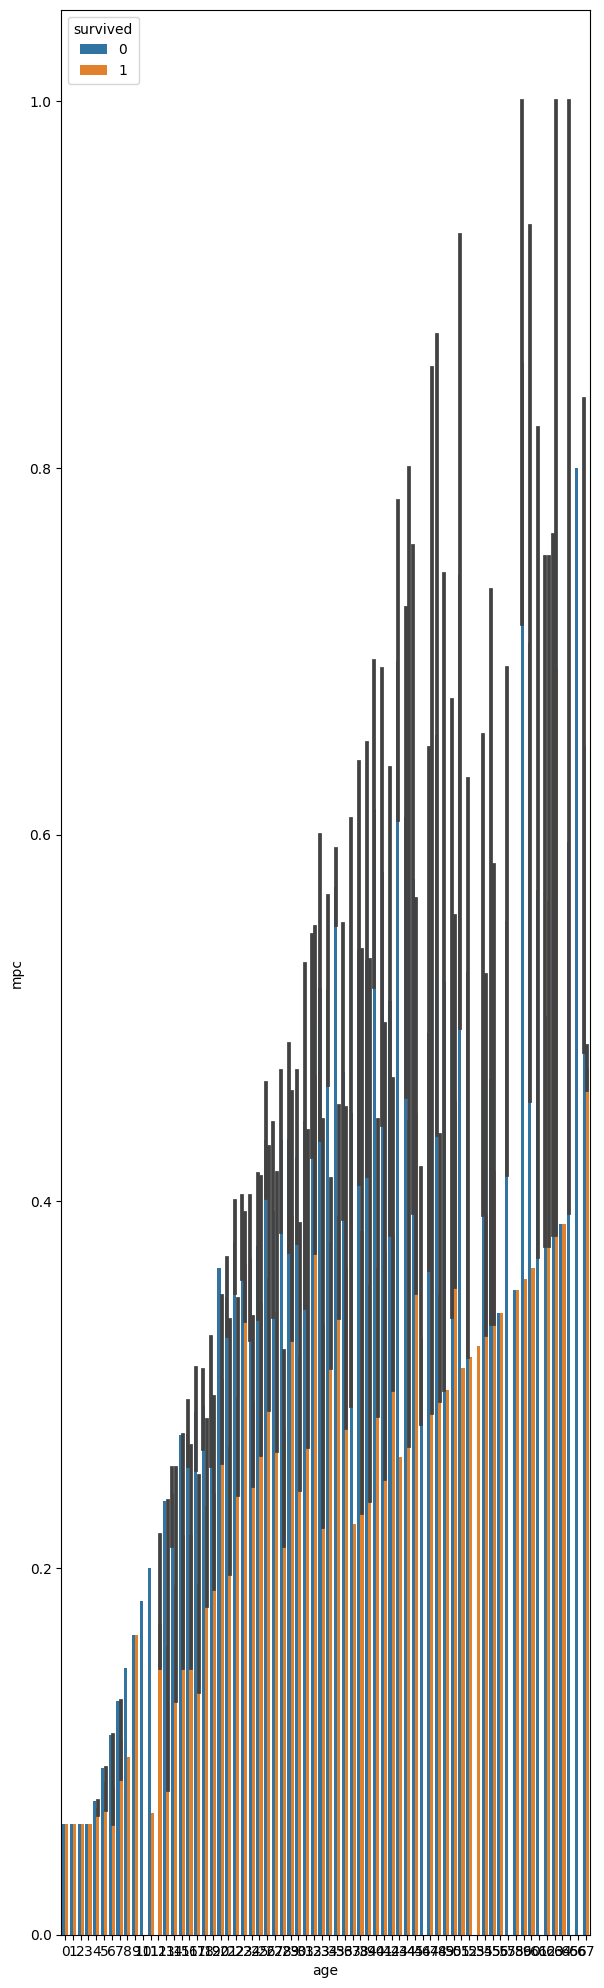

In [ ]:
plt.figure(figsize = (10,3), dpi = 100)

plt.subplot(1,2,1)
sns.barplot(y = 'age' ,x = 'title' ,hue = 'survived',data = data_titanic)

plt.figure(figsize = (10,3), dpi = 100)

plt.subplot(1,2,1)
sns.barplot(y = 'age' ,x = 'family_Size' ,hue = 'survived',data = data_titanic)

plt.figure(figsize = (10,3), dpi = 100)

plt.subplot(1,2,1)
sns.barplot(y = 'age' ,x = 'pclass' ,hue = 'survived',data = data_titanic)

plt.figure(figsize = (10,3), dpi = 100)

plt.subplot(1,2,1)
sns.barplot(y = 'age' ,x = 'sex' ,hue = 'survived',data = data_titanic)


plt.figure(figsize = (15,25), dpi = 100)

plt.subplot(1,2,1)
sns.barplot(y = 'mpc' ,x = 'age' ,hue = 'survived',data = data_titanic)


In [ ]:
for var in ['sex','cabin','embarked','title','age_range']:
    data_titanic = pd.get_dummies(data_titanic, prefix = var, columns = [var], drop_first = True)

data_titanic

,pclass,survived,age,ticket,fare,family_Size,mpc,sex_male,cabin_A11,cabin_A14,...,embarked_S,title_Col.,title_Royal.,title_Master.,title_Miss.,title_Mr.,title_Mrs.,age_range_Dorosly,age_range_Dzieciak,age_range_Nastolatek
0,1,1,29,24160,0.812837,1,0.175758,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,1,1,0,113781,0.582885,4,0.060606,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,2,113781,0.582885,4,0.060606,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,30,113781,0.582885,4,0.181818,1,0,0,...,1,0,0,0,0,1,0,1,0,0
4,1,0,25,113781,0.582885,4,0.151515,0,0,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14,2665,0.055593,2,0.254545,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1305,3,0,23,2665,0.055593,2,0.418182,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1306,3,0,26,2656,0.027788,1,0.472727,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1307,3,0,27,2670,0.027788,1,0.490909,1,0,0,...,0,0,0,0,0,1,0,1,0,0


Tworzenie a raczej rozlozenie kolumn na mniejsze kolumny aby wartosci byly 0 lub jeden dla kolumn gdzie wystepuja stringi lub char. Wszystskie wartości oprczy liczbowych nie mogą się znalezc podczas nauki programu. Wystapi bład

In [ ]:
data_titanic['pclass'] = data_titanic['pclass'].astype('int64')
data_titanic['ticket'] = data_titanic['ticket'].astype('int64')

train_data = data_titanic[~(data_titanic['survived'].isna())]
test_data = data_titanic[data_titanic['survived'].isna()]

X = train_data.drop(columns = ['survived'])
y = train_data['survived']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)
X_train.shape[0], X_test.shape[0]

(1047, 262)

Dzielenie kodu na wartosci treningowe i testowe

In [ ]:
model_dict = {
    'Logistic Regression' : LogisticRegression,
    'Random Forest' : RandomForestClassifier,
    'Ada Boost' : AdaBoostClassifier,
    'Gradient Boost' : GradientBoostingClassifier,
    'XG Boost' : XGBClassifier
}



Tworzenie modelu do nauki

In [ ]:
model_score = pd.DataFrame()

for curr_model in model_dict:
    model = model_dict[curr_model]()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_score = model_score.append({  'Model' : curr_model,
                                        'Accuracy' : round(accuracy_score(y_test, y_pred),3),
                                        'Recall' : round(recall_score(y_test, y_pred),3),
                                        'Precision' : round(precision_score(y_test, y_pred),3),
                                        'F1 Score' : round(f1_score(y_test, y_pred),3)
                                        }, ignore_index=True)

model_score.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-61-293d635a5250>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append({  'Model' : curr_model,
<ipython-input-61-293d635a5250>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append({  'Model' : curr_model,
<ipython-input-61-293d635a5250>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append({  'Model' : curr_model,
<ipython-input-61-293d635

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.637,0.000,0.000,0.000
1,Random Forest,0.821,0.695,0.786,0.737
2,Ada Boost,0.802,0.726,0.726,0.726
3,Gradient Boost,0.821,0.716,0.773,0.743
4,XG Boost,0.817,0.747,0.747,0.747


Nauka modelu wraz z jej ewaluacja i wypisaniem wyników dla poszczególnych algorytmów uczących. Jak widzimy ze wzgledu na dokładność najlepszym modelem jest Gradient Boost z Accuracy 82.4%

In [ ]:
data_titanic.drop(columns = ['ticket'],axis = 1,  inplace = True)

In [ ]:
#adding new and editing value
data_titanic['alone'] = data_titanic['family_Size'].map(lambda x : '1' if x == 1 else '0')
data_titanic['alone'] = data_titanic['alone'].astype('int64')

data_titanic['priority'] = data_titanic['age_range_Dzieciak'].map(lambda x : '1' if x == 1 else '0')

for a in range(len(data_titanic['priority'])):
  if data_titanic['sex_male'][a] == 0 and data_titanic['age_range_Dorosly'][a] and data_titanic['family_Size'][a]>2 and data_titanic['pclass'][a]==3:
    data_titanic['priority'][a]=1


data_titanic['priority'] = data_titanic['priority'].astype('int64')

data_titanic['mpc']=data_titanic['mpc']*100


data_titanic

<ipython-input-63-e89c27fa2a15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['priority'][a]=1


,pclass,survived,age,fare,family_Size,mpc,sex_male,cabin_A11,cabin_A14,cabin_A16,...,title_Royal.,title_Master.,title_Miss.,title_Mr.,title_Mrs.,age_range_Dorosly,age_range_Dzieciak,age_range_Nastolatek,alone,priority
0,1,1,29,0.812837,1,17.575758,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,1,0,0.582885,4,6.060606,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,2,0.582885,4,6.060606,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,30,0.582885,4,18.181818,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,25,0.582885,4,15.151515,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14,0.055593,2,25.454545,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1305,3,0,23,0.055593,2,41.818182,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1306,3,0,26,0.027788,1,47.272727,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1307,3,0,27,0.027788,1,49.090909,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
train_data = data_titanic[~(data_titanic['survived'].isna())]
test_data = data_titanic[data_titanic['survived'].isna()]

X = train_data.drop(columns = ['survived'])
y = train_data['survived']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)
X_train.shape[0], X_test.shape[0]

model_dict = {
    'Logistic Regression' : LogisticRegression,
    'Random Forest' : RandomForestClassifier,
    'Ada Boost' : AdaBoostClassifier,
    'Gradient Boost' : GradientBoostingClassifier,
    'XG Boost' : XGBClassifier
}

model_score = pd.DataFrame()

for curr_model in model_dict:
    model = model_dict[curr_model]()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_score = model_score.append({  'Model' : curr_model,
                                        'Accuracy' : round(accuracy_score(y_test, y_pred),3),
                                        'Recall' : round(recall_score(y_test, y_pred),3),
                                        'Precision' : round(precision_score(y_test, y_pred),3),
                                        'F1 Score' : round(f1_score(y_test, y_pred),3)
                                        }, ignore_index=True)

model_score.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-64-d2fabf9707fa>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append({  'Model' : curr_model,
<ipython-input-64-d2fabf9707fa>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append({  'Model' : curr_model,
<ipython-input-64-d2fabf9707fa>

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.805,0.716,0.739,0.727
1,Random Forest,0.809,0.695,0.759,0.725
2,Ada Boost,0.786,0.737,0.693,0.714
3,Gradient Boost,0.828,0.737,0.778,0.757
4,XG Boost,0.840,0.758,0.791,0.774


Można zauważyć, że po dodaniu dwóch nowych kolumn zależnych od już isniejących
Accuracy wzrosło i jak wcześniej wygrał Gradient Boost tak teraz zwycięzył XG Boost majać 84% accuracy.